# Minta zh, bevezetés az adattudományba

## 1. feladat
1.1 Olvass be az iris.csv-t egy dataframe-be  
1.2 Módosítsd a dataframe oszlopai nevét, úgy hogy a pont helyett aláhúzás legyen Pl.: sepal.length --> sepal_length  
1.3 Dobd el azokat a sorokat, amikben van NaN  
1.4 Irattasd ki a 'variety' oszlop különböző értékeit. Minden érték csak egyszer szerepeljen  
1.5 Vizsgáld meg milyen korreláció van a Dataframe egyes oszolopai között. (df.corr) Irasd ki a legnagyobb korrelációt két különböző oszlop között  
1.6 Módosítsd a 'variety' értékét számokra. Setosa --> 0, Versicolor --> 1, Virginica --> 2  
1.7 Dobd el 'sepal.width' oszlopot  
1.8 Jelenítsd meg egy kördiagramon a 'variety' eloszlását, illetve jelenítsd meg labelben az osztályok nevét is.
1.9 A petal_length és petal_width-et jeleníts meg egy scatter plot-on. A osztályonként térjenek el a színek. Az X tengelyen a pental_width, az Y tengelyen pedig a pental_width jelenjen meg.

(numpy, pandas, matplotlib)

In [45]:
#minden fontos import
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

file_path = ".\\iris.csv"

In [46]:
#1.1
#load from csv
df = pd.read_csv(file_path)

#load from dataset
iris = load_iris()
df2 = pd.DataFrame(iris.data, columns=iris.feature_names)

In [47]:
#1.2
#rename columns
df.columns = df.columns.str.replace('.', '_')

C:\Users\Albi\AppData\Local\Temp\ipykernel_3188\968307839.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace('.', '_')


In [48]:
#1.3
#drop nulls
df = df.dropna()

In [49]:
#1.4
#get unique values
unique_values = df['variety'].unique()

print(unique_values)

['Setosa' 'Versicolor' 'Virginica']


In [50]:
#1.5
corr = df.corr()

print(corr)

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


C:\Users\Albi\AppData\Local\Temp\ipykernel_3188\4176915826.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


In [51]:
#1.6
#replace strings as numbers
df['variety'] = df['variety'].replace({'Setosa': 0, 'Versicolor': 1, 'Virginica': 2})

In [52]:
#1.7
#drop column
df = df.drop(columns=['sepal_width'])

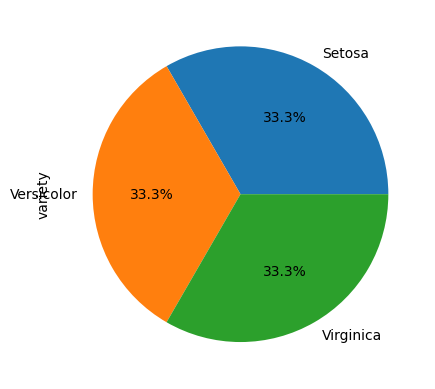

In [53]:
#1.8
#df plot
df['variety'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=['Setosa', 'Versicolor', 'Virginica'])
plt.show()

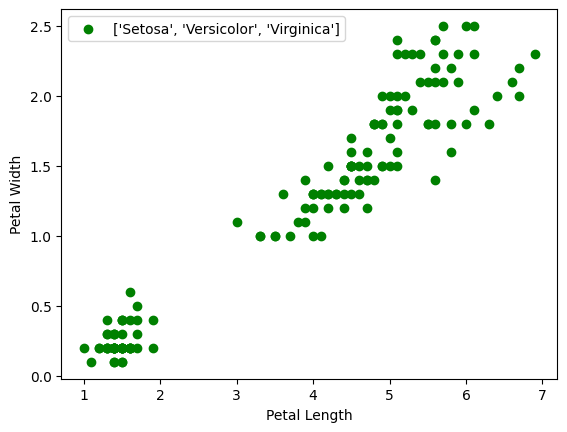

In [54]:
#1.9
colors = ['red', 'green', 'blue']
species = ['Setosa', 'Versicolor', 'Virginica']

plt.scatter(df['petal_length'], df['petal_width'], color=colors[1], label=species)

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

In [55]:
df

,sepal_length,petal_length,petal_width,variety
0,5.1,1.4,0.2,0
1,4.9,1.4,0.2,0
2,4.7,1.3,0.2,0
3,4.6,1.5,0.2,0
4,5.0,1.4,0.2,0
...,...,...,...,...
145,6.7,5.2,2.3,2
146,6.3,5.0,1.9,2
147,6.5,5.2,2.0,2
148,6.2,5.4,2.3,2


## 2. feladat
2.1 A 'variety' legyen a cél függvény, a maradék oszlopok pedig a tanító halmaz  
2.2 Spliteld szét a dataframe-t. A tanító adathalmaz legyen 70%, a test pedig 30%. A random state pedig legyen 42  

(sklearn)

In [56]:
# 2.1
#X alapján tanul
X = df.drop(columns=['variety'])
#y amit kategorizálni fog
y = df['variety']

# 2.2
#ez mindig igy van
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## 3. feladat
3.1 Taníts fel egy decision tree-t  
3.2 Írtattasd ki a modell pontosságát  
3.3 Jelenítsd meg a decision tree-t matplotlib segítségével  

(sklearn)

A modell pontossága: 1.0


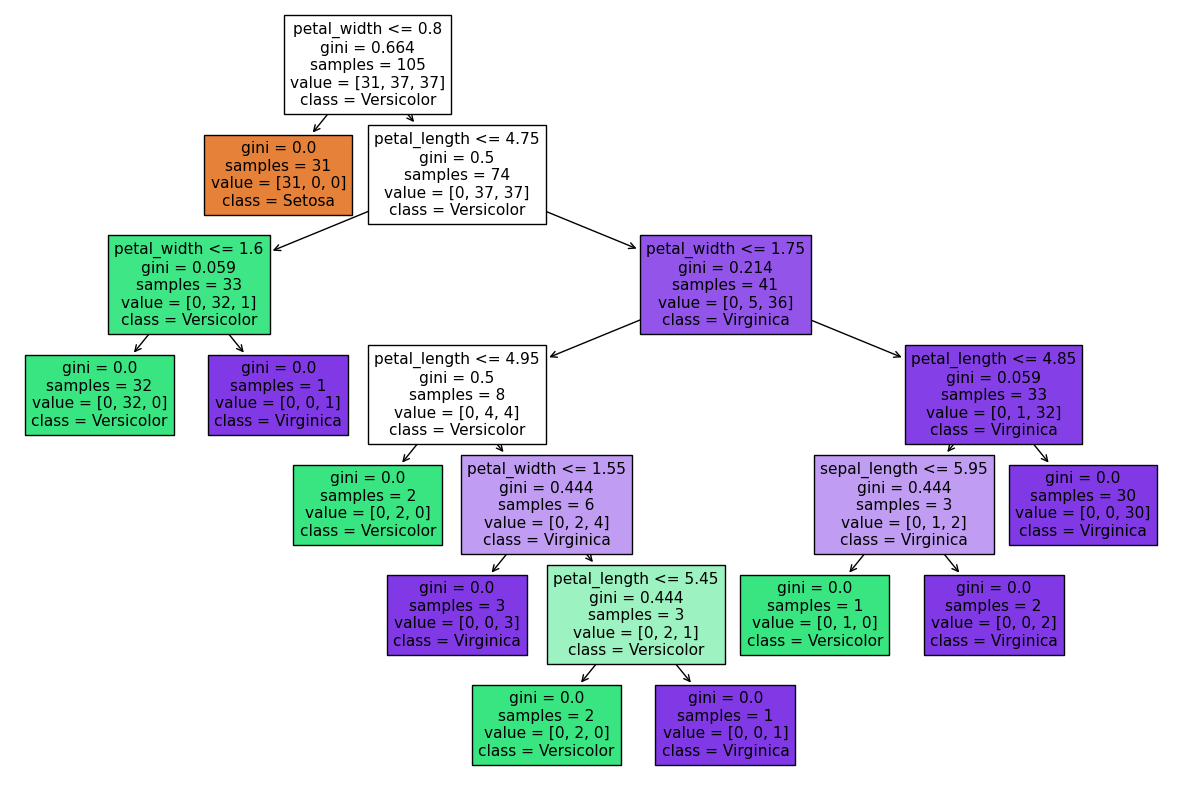

In [57]:
# 3.1
#mindegy milyen classifier ez mindig ez
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

# 3.2
#és ez is
y_pred = clf.predict(X_test)
print('A modell pontossága:', accuracy_score(y_test, y_pred))

# 3.3
fig = plt.figure(figsize=(15,10))
treePlot = tree.plot_tree(clf, feature_names=['sepal_length', 'petal_length', 'petal_width'], class_names=['Setosa', 'Versicolor', 'Virginica'],filled=True)

## 4. feladat 
4.1 Értékeld a tanításodat 5 mondatban. Pl.: mivel lehet pontosítani a modellt, milyen más adatfeldolgozást lehetne csinálni.

In [58]:
'''Az Iris adathalmaz felhasználásával készítettem egy döntési fa osztályozót, 
amelynek pontossági pontszáma (accuracy score) 1.0 lett. 
Ez azt jelenti, hogy a modell minden mintát helyesen osztályozott a tanítóhalmazban. 
Az ilyen magas pontossági eredmény azt sugallja, hogy a modell jól illeszkedett a tanulási adathalmazhoz, 
és a minták jól elkülöníthetők voltak a jellemzők alapján. A döntési fa modell egy könnyen értelmezhető és interpretálható algoritmus,
amely segíthet megérteni, milyen jellemzők befolyásolják a minták osztályozását. '''

'Az Iris adathalmaz felhasználásával készítettem egy döntési fa osztályozót, \namelynek pontossági pontszáma (accuracy score) 1.0 lett. \nEz azt jelenti, hogy a modell minden mintát helyesen osztályozott a tanítóhalmazban. \nAz ilyen magas pontossági eredmény azt sugallja, hogy a modell jól illeszkedett a tanulási adathalmazhoz, \nés a minták jól elkülöníthetők voltak a jellemzők alapján. A döntési fa modell egy könnyen értelmezhető és interpretálható algoritmus,\namely segíthet megérteni, milyen jellemzők befolyásolják a minták osztályozását. '